1.回归问题和分类问题的联系和区别，如何利用回归问题理解分类问题

In [ ]:
回归问题的因变量是连续变量，分类问题的因变量是离散变量。

可以，但效果不好。
当因变量处于负数或大于1的值，没有意义，转成[0,1],借助逻辑回归解决。

#mse衡量真实值与预测值的相似程度。
#因为分类问题预测的结果错误会有更大的后果和代价，所以需要更大的惩罚。

2.为什么分类问题的损失函数可以是交叉熵而不是均方误差

In [ ]:
#mse衡量真实值与预测值的相似程度。
#因为分类问题预测的结果错误会有更大的后果和代价，所以需要更大的惩罚？

使用交叉熵可以更快收敛。
以sigmoid为例，由于输出在（0，1），使用mse的时候，梯度学习非常慢，而交叉熵不存在这个问题。

3.线性判别分析和逻辑回归在估计参数方面有什么异同点

In [ ]:
逻辑回归需要直接算出值的大小进行比较。
线性判别只需要把比较分子就可以了。

4.尝试从0推导svm

5.二次判别分析，线性判别分析，朴素贝叶斯之间的联系和区别？

In [ ]:
朴素贝叶斯在lda的基础之上发展而来，朴素贝叶斯假设各个特征之间是不相关的，但线性判别分析中各种特征是不是独立的。
二次判别分析与线性判别分析在于，线性判别分析假设每个分类的协方差矩阵是相同的，而二次判别分析假设各类别的协方差矩阵都不相同，即判别边界不是直线。


6.使用python+numpy实现逻辑回归。

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
dataset = load_breast_cancer()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['cancer'] = [dataset.target_names[t] for t in dataset.target]

In [39]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    s = s.reshape(s.shape[0],1)
    return s

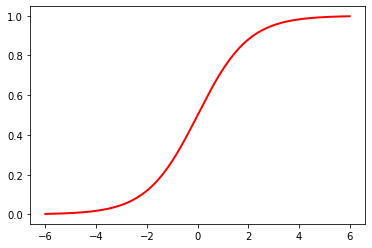

In [43]:
def draw_sigmoid():
    x = np.arange(-6, 6, .01)
    y = sigmoid(x)

    plt.plot(x, y, color='red', lw=2)
    plt.show()

draw_sigmoid()

In [44]:
def model(theta, X):
    z = np.sum(theta.T * X, axis=1)
    return sigmoid(z)

In [45]:
#cross_entropy
def cross_entropy(y, y_hat):
    n_samples = y.shape[0]
    return sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))/n_samples

def cost_function(theta, X, y):
    y_hat = model(theta, X)
    return cross_entropy(y, y_hat)

In [61]:
def optimize(theta,X,y):
    n = X.shape[0]
    alpha = 1e-1
    y_hat = model(theta,X)
    dtheta = (1.0/n) * ((y_hat-y)*X)
    dtheta = np.sum(dtheta, axis=0)
    dtheta=dtheta.reshape((31,1))
    theta = theta - alpha * dtheta
    return theta

In [62]:
def predict_proba(theta, X):
    y_hat=model(theta, X)
    return y_hat

def predict(X, theta):
    y_hat=predict_proba(theta,X)
    y_hard=(y_hat > 0.5) * 1
    return y_hard

def accuracy(theta, X, y):
    y_hard=predict(X, theta)
    count_right=sum(y_hard == y)
    return count_right*1.0/len(y)

In [63]:
def iterate(theta,X,y,times):
    costs = []
    accs = []
    for i in range(times):
        theta = optimize(theta,X,y)
        costs.append(cost_function(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, costs, accs

In [64]:
X = dataset.data
y = dataset.target
n_features = X.shape[1]

std=X.std(axis=0)
mean=X.mean(axis=0)
X_norm = (X - mean) / std

In [67]:
def add_ones(X):
    ones=np.ones((X.shape[0],1))
    X_with_ones=np.hstack((ones, X))
    return X_with_ones
X_with_ones = add_ones(X_norm)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_with_ones, y, test_size = 0.3, random_state=12345)
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))

In [68]:
theta = np.ones((n_features+1,1))

In [72]:
theta, costs, accs = iterate(theta, X_train, y_train, 1500)

c:\users\thinkpad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


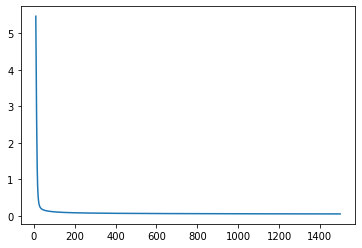

In [73]:
plt.plot(costs)

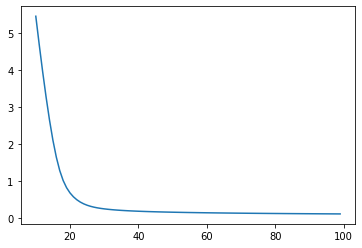

In [74]:
plt.plot(costs[:100])

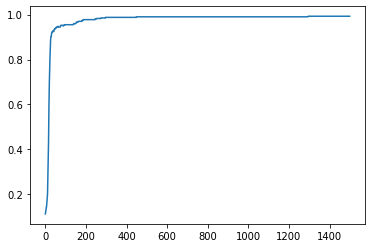

In [75]:
plt.plot(accs)

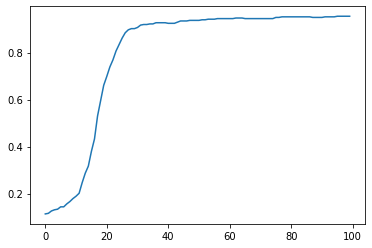

In [76]:
plt.plot(accs[:100])

In [77]:
print(costs[-1], accs[-1])

[0.0489982] [0.99246231]


In [78]:
accuracy(theta, X_test, y_test)

array([0.97660819])

7.了解梯度下降法，牛顿法，拟牛顿法与smo算法等优化算法。